# CD4 T and CD8 T UMAPs and Dotplots
Figure 2 D-E, Extended Figure C-D

- Authors: CW, RT
- files needed: 5_RNA_CD8T_cells.rds, 6_RNA_CD4T_cells.rds
- Last updated: 04/09/24

In [1]:
library(Seurat)
library(ggplot2)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



## 1. CD8 T cells

In [12]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [20]:
obj.CD8 <- readRDS('/path_to_file/objects_for_DC_manuscript/for_public/5_CD8T_cells.rds')

In [23]:
#change levels 
obj.CD8$cell_subtype <- factor(obj.CD8$cell_subtype, 
                                 levels = c('Tn', "early activated Teff",
               "HNRNPH1+ Teff", "GZMK+ Teff", "Tem", 
               "Texme", "Tex/HS", "GNLY+ Tex", "FTL+ Tex", 
               "NKT"))

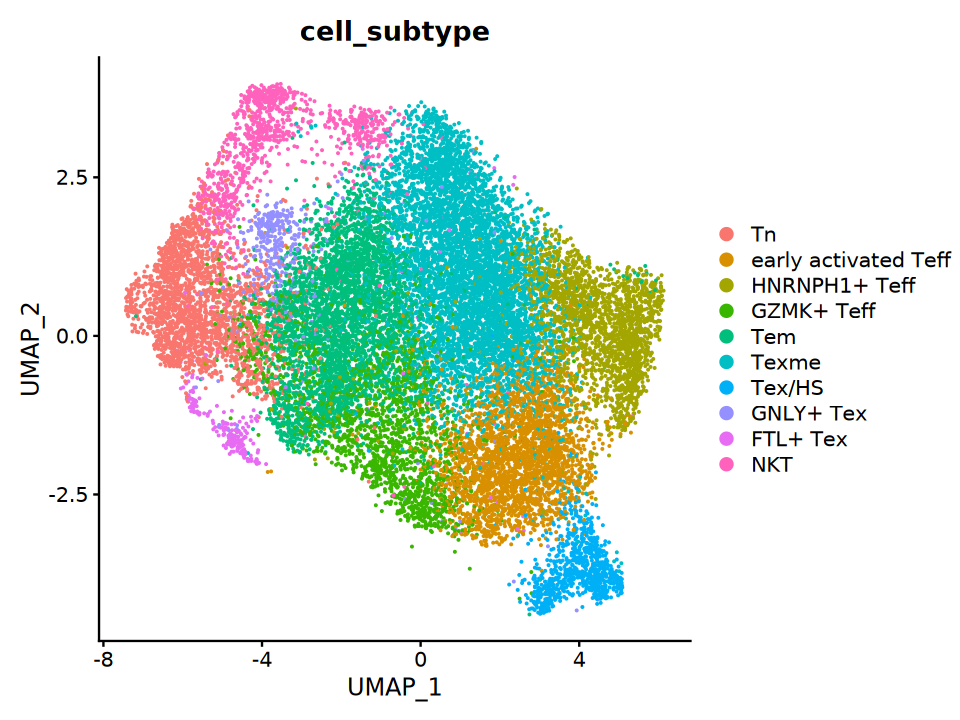

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj.CD8, group.by = 'cell_subtype')

In [28]:
#Number of cells: 21710
obj.CD8
total_n_CD8 <- 21710

An object of class Seurat 
48572 features across 21710 samples within 3 assays 
Active assay: SCT (18536 features, 0 variable features)
 2 other assays present: RNA, integrated
 4 dimensional reductions calculated: pca, umap, DC, harmony

### Calculate percentages

In [27]:
CD8_props <- data.frame(row.names = unique(obj.CD8@meta.data$cell_subtype))

CD8_props$count <- 0
CD8_props$percentage <- 0
for(ct in rownames(CD8_props))
{
  CD8_props[ct,]$count <- length(rownames(obj.CD8@meta.data[obj.CD8@meta.data$subtyped_cell_type == ct,]))
}
CD8_props$percentage <- round(x = 100 * CD8_props$count/length(rownames(obj.CD8@meta.data)), 2)


In [28]:
# relabel ident
obj.CD8$subtyped_cell_type_percent = 'none'

In [31]:
for (ident in rownames(CD8_props))
{
  obj.CD8@meta.data[obj.CD8@meta.data$subtyped_cell_type == ident,]$subtyped_cell_type_percent <- paste0(ident, " (", CD8_props[ident,]$percentage, "%)")
}

Idents(obj.CD8) <- "subtyped_cell_type_percent"


In [30]:
unique(obj.CD8$subtyped_cell_type_percent)

[1] "Texme (27.57%)"                "early activated Teff (12.95%)"
 [3] "HNRNPH1+ Teff (10.13%)"        "Tex/HS (3.98%)"               
 [5] "Tem (18.14%)"                  "FTL+ Tex (1.05%)"             
 [7] "GZMK+ Teff (8.97%)"            "Tn (10.51%)"                  
 [9] "GNLY+ Tex (1.87%)"             "NKT (4.82%)"

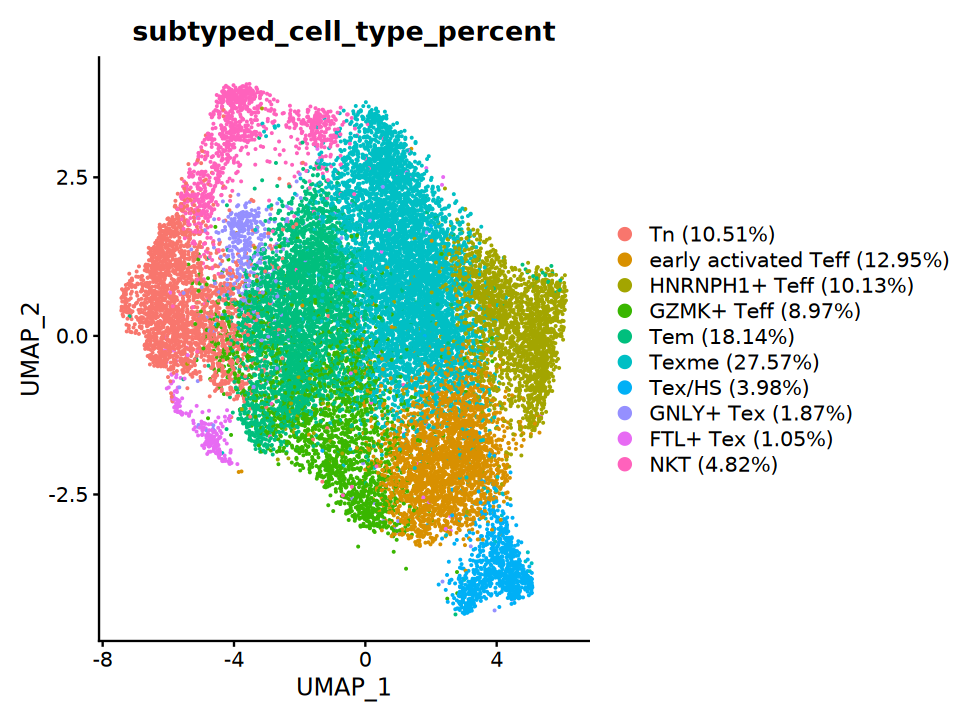

In [32]:
#change levels 
#change levels 
obj.CD8$subtyped_cell_type_percent <- factor(obj.CD8$subtyped_cell_type_percent, 
             levels = c('Tn (10.51%)', "early activated Teff (12.95%)",
               "HNRNPH1+ Teff (10.13%)", "GZMK+ Teff (8.97%)",
                "Tem (18.14%)", "Texme (27.57%)", "Tex/HS (3.98%)",
                    "GNLY+ Tex (1.87%)", "FTL+ Tex (1.05%)", 
               "NKT (4.82%)"))

DimPlot(obj.CD8, group.by = 'subtyped_cell_type_percent')

## CD8 DimPlot - Figure 2D

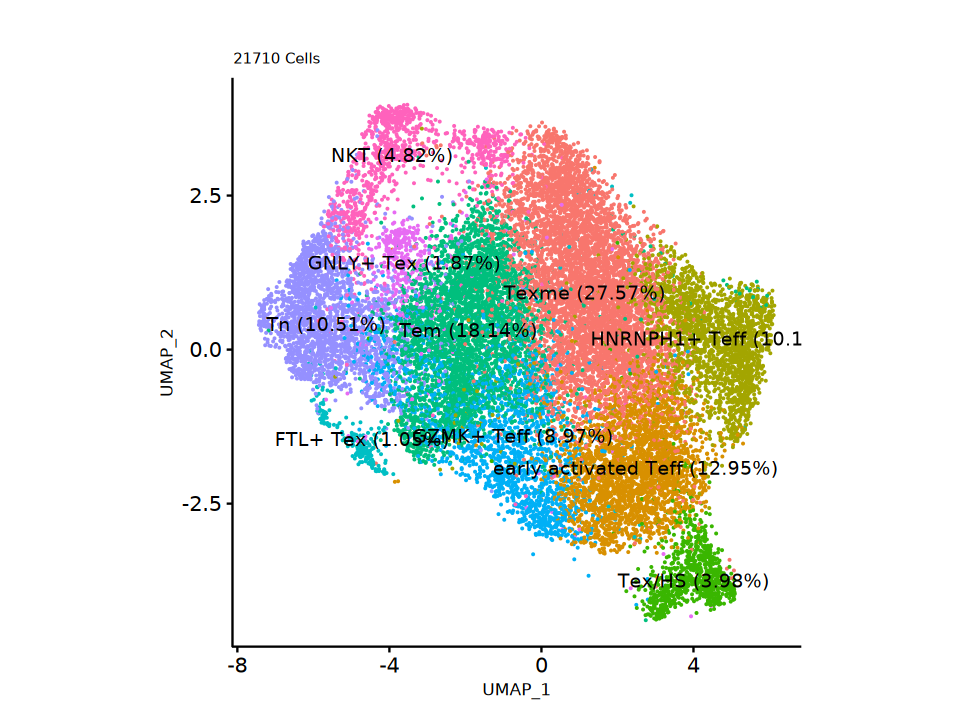

In [34]:
#FIGURE 2D
CD8_subtypes_plot <- DimPlot(obj.CD8, label = TRUE) + NoLegend() + 
    ggtitle("", paste0(length(rownames(obj.CD8@meta.data)), " Cells")) + 
    theme(aspect.ratio = 1, text = element_text(size = 10))
CD8_subtypes_plot

## CD8 DotPlot - Extended Figure 2C

In [37]:
DefaultAssay(obj.CD8) <- 'SCT'

In [45]:
Idents(obj.CD8) <- 'cell_subtype'

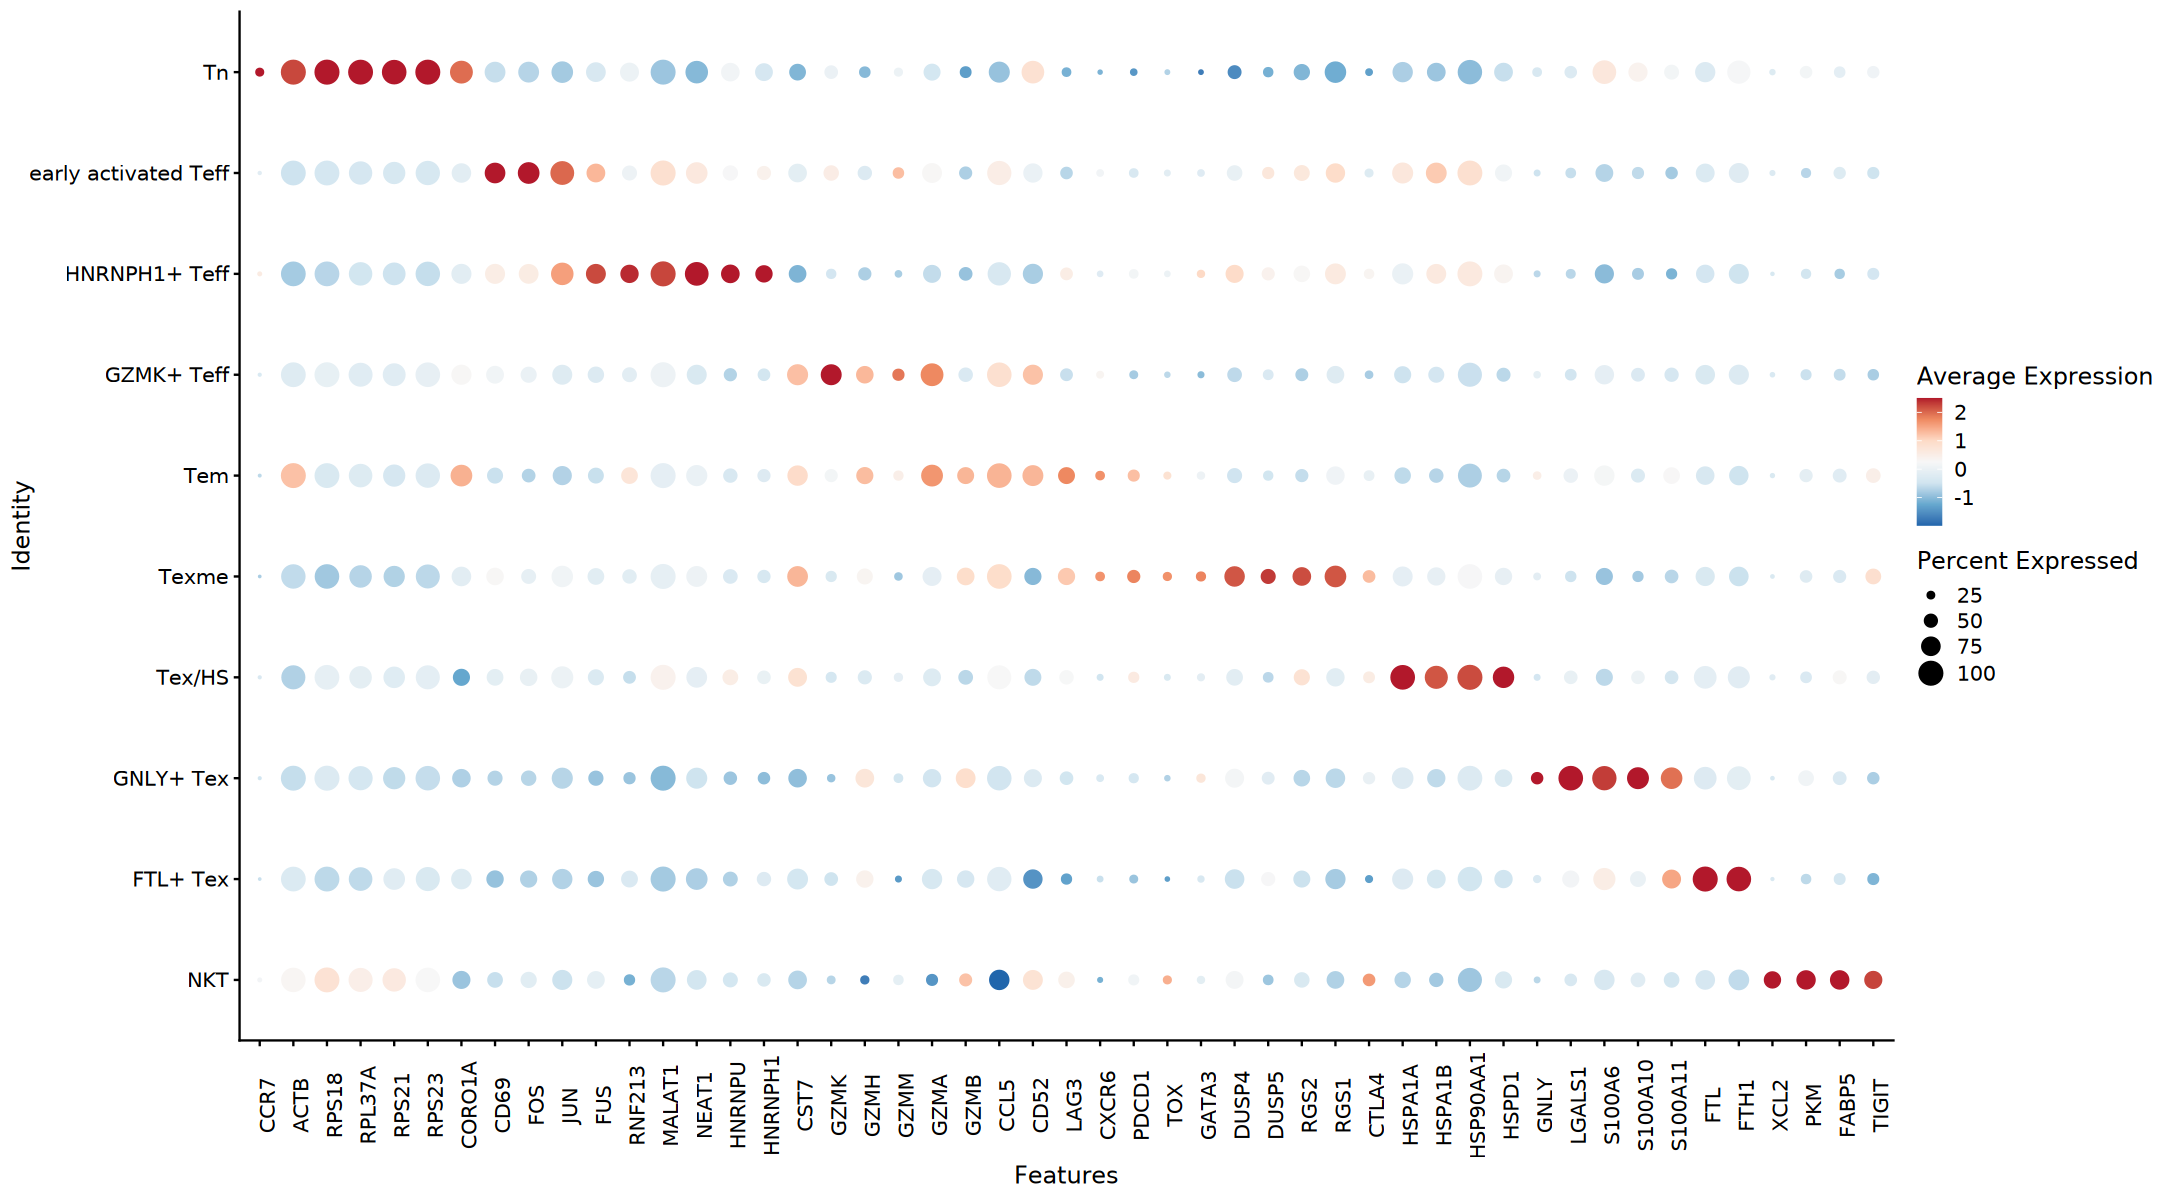

In [51]:
##EXTENDED FIGURE 2C
markers <- c('CCR7', 'ACTB', 'RPS18', 'RPL37A', 'RPS21', 'RPS23', 'CORO1A', 'CD69', 'FOS', 'JUN', 'FUS', 'RNF213', 
            'MALAT1', 'NEAT1', 'HNRNPU', "HNRNPH1", "CST7", "GZMK", "GZMH", "GZMM", "GZMA", "GZMB", "CCL5", 
            "CD52", "LAG3", "CXCR6", "PDCD1", "TOX", "GATA3", "DUSP4", "DUSP5", "RGS2", "RGS1", "CTLA4", 
            "HSPA1A", "HSPA1B", "HSP90AA1", "HSPD1", "GNLY", "LGALS1", "S100A6", "S100A10", "S100A11", "FTL", 
            "FTH1", "XCL2", "PKM", "FABP5", "TIGIT")

options(repr.plot.width = 18, repr.plot.height = 10)
CD8_dotplot <- DotPlot(obj.CD8, features = markers, cols = 'RdBu') + theme(axis.text.x = element_text(angle = 90))
CD8_dotplot$data$id <- factor(CD8_dotplot$data$id, levels = rev(c('Tn', "early activated Teff",
               "HNRNPH1+ Teff", "GZMK+ Teff", "Tem", 
               "Texme", "Tex/HS", "GNLY+ Tex", "FTL+ Tex", 
               "NKT")))
CD8_dotplot

# CD4 T 

In [52]:
#CD4 
obj.CD4 <- readRDS("/path_to_file/6_CD4T_cells.rds")
obj.CD4

An object of class Seurat 
48572 features across 17952 samples within 3 assays 
Active assay: SCT (18536 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 4 dimensional reductions calculated: pca, umap, harmony, DC

In [53]:
#change levels
obj.CD4$cell_subtype <- factor(obj.CD4$cell_subtype,
                     levels = c("Tn", "CD69+ T", "Tm", "Tex", "Treg", "NKT"))

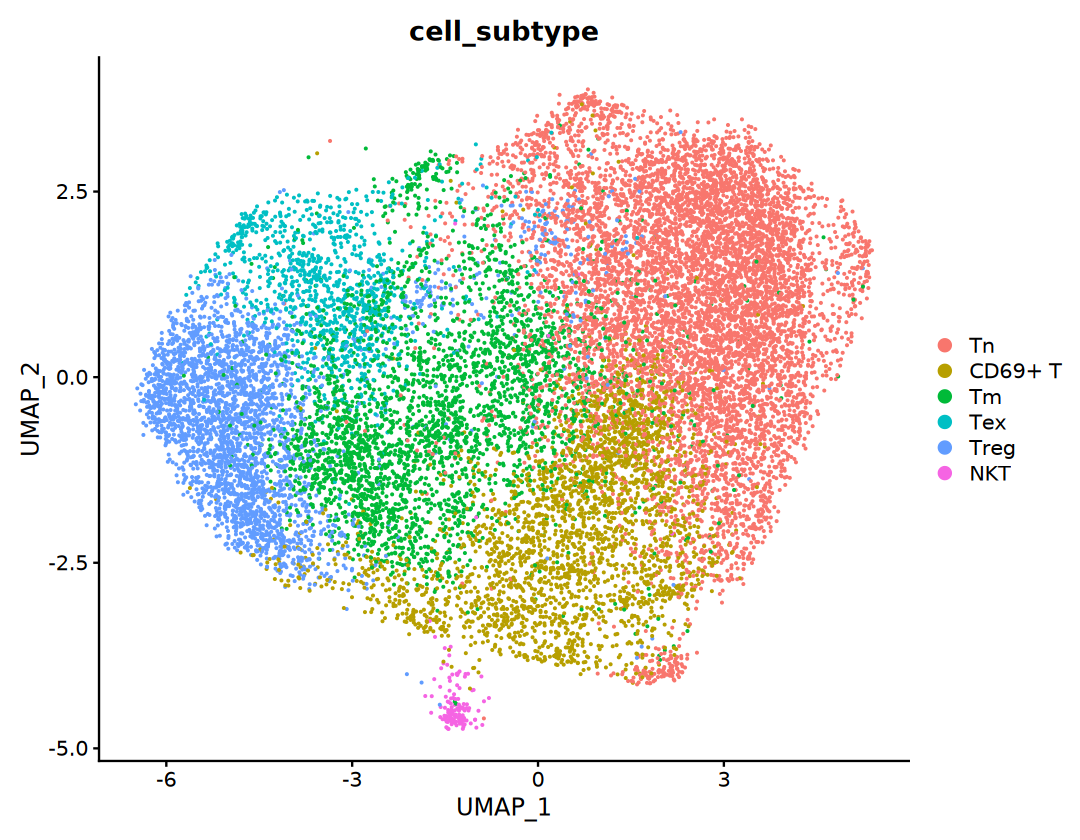

In [56]:
options(repr.plot.width = 9, repr.plot.height = 7)
DimPlot(obj.CD4, group.by = 'cell_subtype')

In [25]:
# calculate percentages
CD4_props <- data.frame(row.names = unique(obj.CD4@meta.data$subtyped_cell_type))

CD4_props$count <- 0
CD4_props$percentage <- 0
for(ct in rownames(CD4_props))
{
  CD4_props[ct,]$count <- length(rownames(obj.CD4@meta.data[obj.CD4@meta.data$subtyped_cell_type == ct,]))
}
CD4_props$percentage <- round(x = 100 * CD4_props$count/length(rownames(obj.CD4@meta.data)), 2)

In [26]:
#add percentages
CD4T_subset$subtyped_cell_type_percent <- 'none'
for (ident in rownames(CD4_props))
{
  CD4T_subset@meta.data[obj.CD4@meta.data$subtyped_cell_type == ident,]$subtyped_cell_type_percent <- paste0(ident, " (", CD4_props[ident,]$percentage, "%)")
}

In [57]:
levels(obj.CD4$subtyped_cell_type_percent)

[1] "Tn (43.14%)"     "CD69+ T (15.7%)" "Tm (17.74%)"     "Tex (5.94%)"    
[5] "Treg (16.71%)"   "NKT (0.77%)"

In [58]:
#change levels
obj.CD4$subtyped_cell_type_percent <- factor(obj.CD4$subtyped_cell_type_percent,
                     levels = c("Tn (43.14%)", "CD69+ T (15.7%)",
                                "Tm (17.74%)", 
                                "Tex (5.94%)", "Treg (16.71%)", 
                                "NKT (0.77%)"))


## CD4 DimPlot - Figure 2E

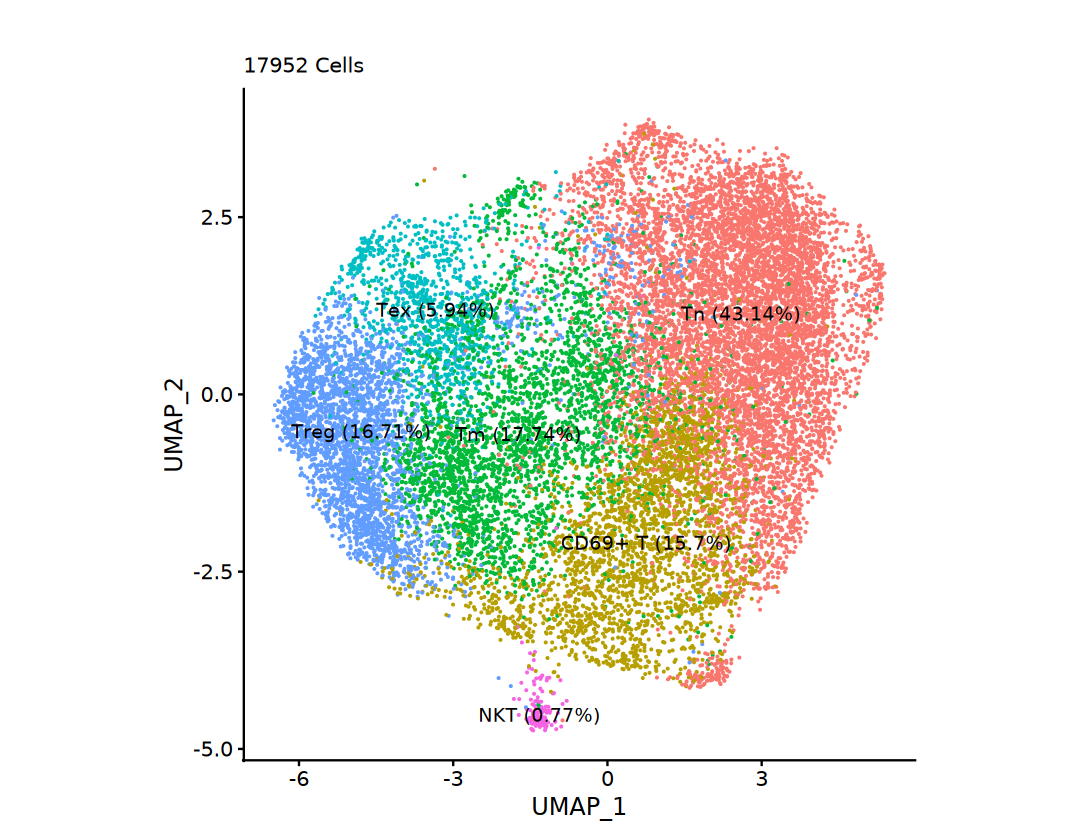

In [60]:
#FIGURE 2E
Idents(obj.CD4) <- "subtyped_cell_type_percent"

CD4_subtypes_plot <- DimPlot(obj.CD4, label = TRUE) + NoLegend() + 
ggtitle("", paste0(length(rownames(obj.CD4@meta.data)), " Cells")) + 
theme(aspect.ratio = 1)
CD4_subtypes_plot

## CD4 DotPlot - Extended Figure 2D

In [61]:
DefaultAssay(obj.CD4) <- 'SCT'

In [63]:
##EXTENDED FIGURE 2D
CD4.markers <- c('CCR7', 'RPS3A', 'RPS13', 'RPS5', 'CD48', 'KLF2', 'CD69', 'FOS', 'HSPA1B', 'HSP90AA1', 'JUN', 
            'ANXA1', 'CCL5', 'S100A11', 'MAF', 'RNF19A', 'GAPDH', 'PDCD1', 'TOX', 'TIGIT', 'CTLA4', 'BATF', 
            'FOXP3', 'PMAIP1', 'CARD16', 'IL32', 'XCL1', 'XCL2', 'KLRD1', 'KLRB1')

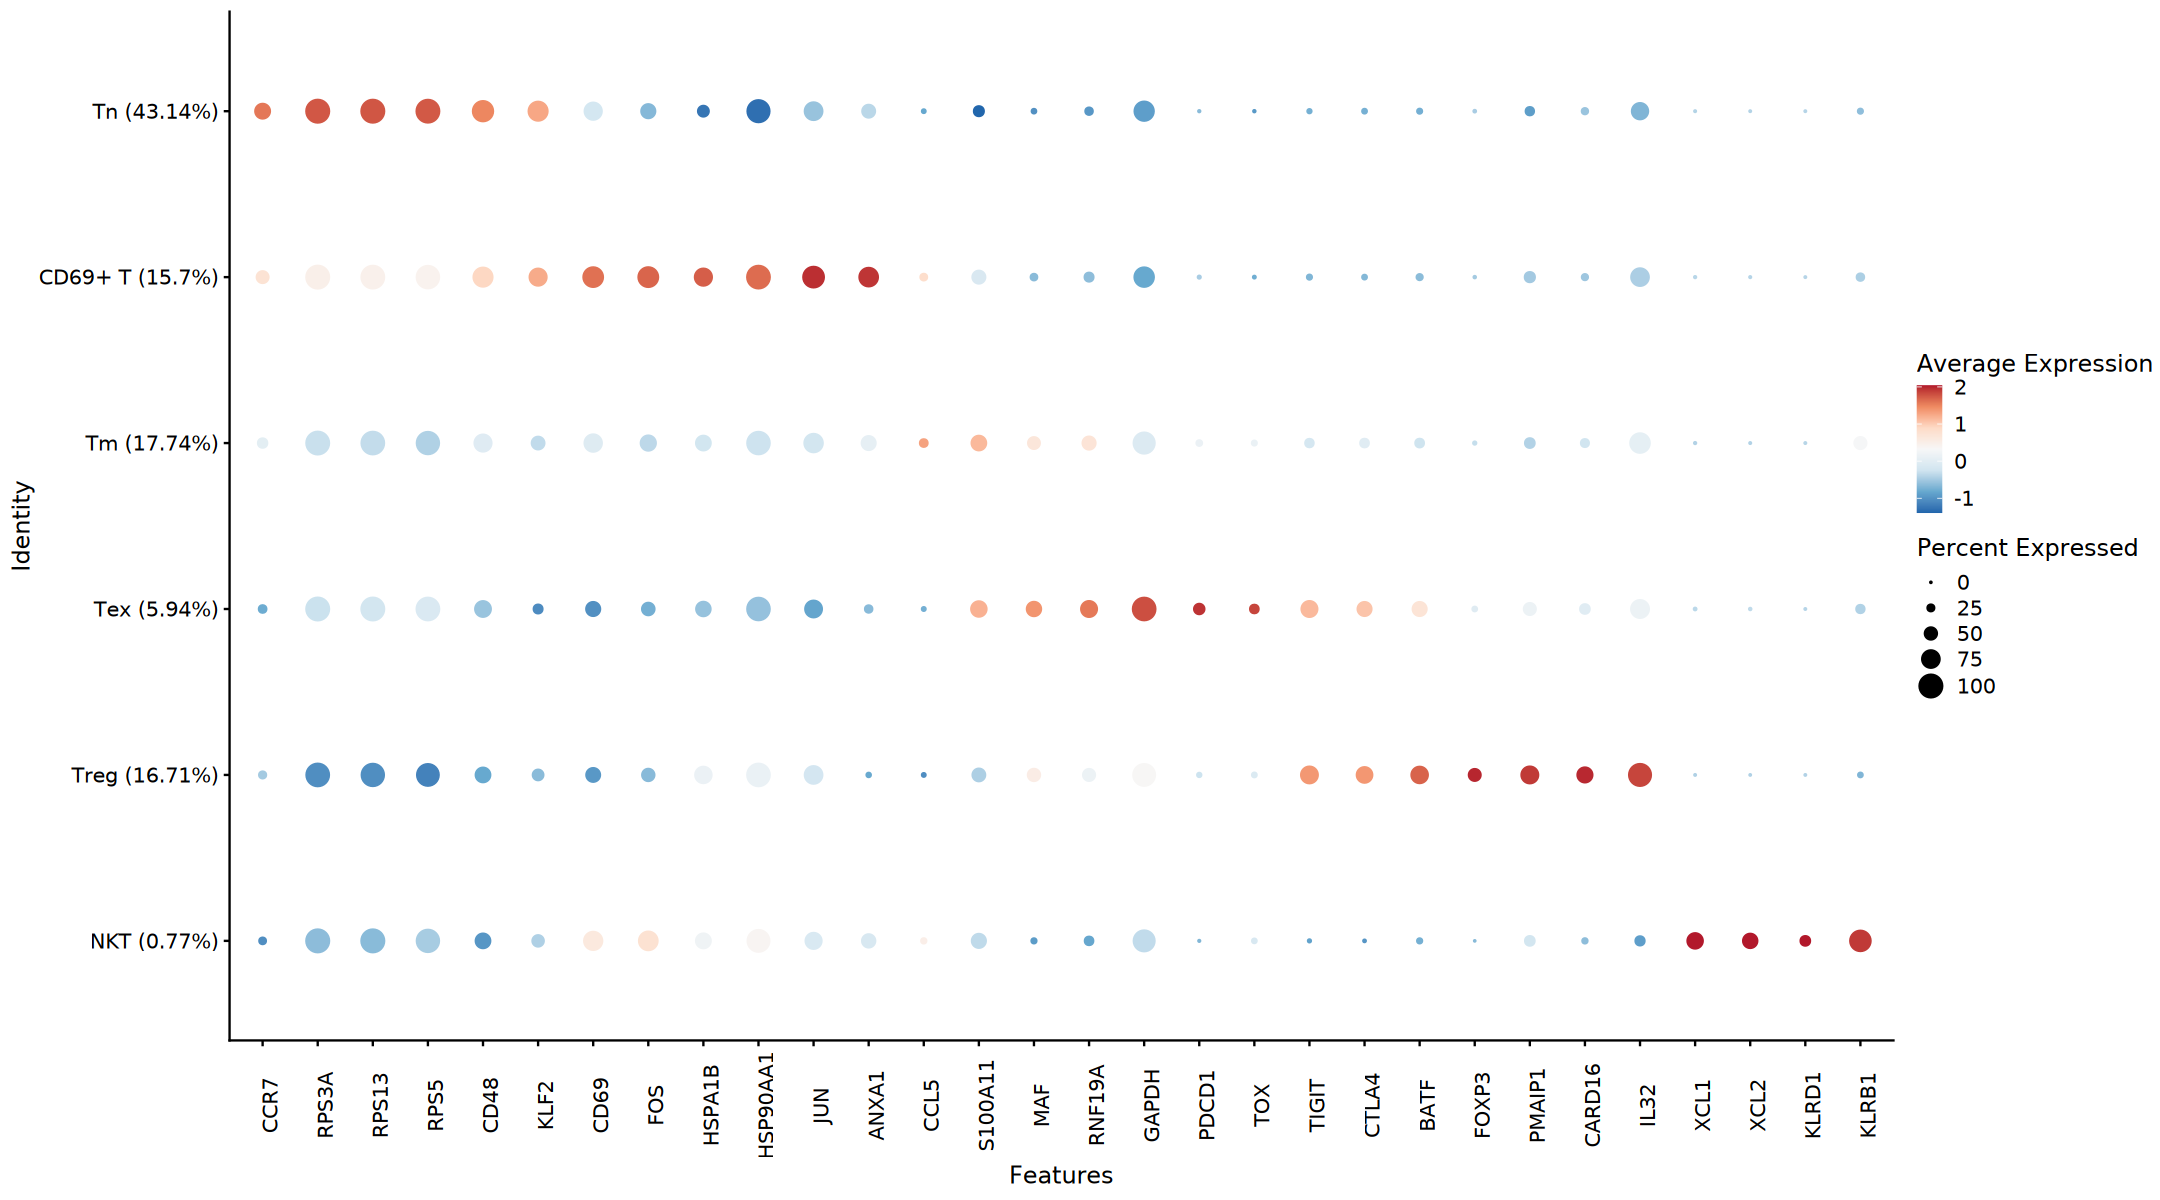

In [65]:
options(repr.plot.width = 18, repr.plot.height = 10)
CD4_dotplot <- DotPlot(obj.CD4, features = CD4.markers, cols = 'RdBu') + theme(axis.text.x = element_text(angle = 90))
CD4_dotplot$data$id <- factor(CD4_dotplot$data$id, levels = rev(c("Tn (43.14%)", "CD69+ T (15.7%)",
                                "Tm (17.74%)", 
                                "Tex (5.94%)", "Treg (16.71%)", 
                                "NKT (0.77%)")))

CD4_dotplot

In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.0      SeuratObject_5.0.1 Seurat_4.3.0.1    

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-4          
  [4] ggridges_0.5.6         IRdisplay_1.1          base64enc_0.1-3       
  [7] spatstat.data_3.0-4